In [0]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline

In [0]:
# To get our dataset:
def load_dataset():
    
    train_dataset = h5py.File('train.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

#     print(train_dataset)

#     print("{}".format(train_set_x_orig.shape));
#     print("\n{}".format(train_set_y_orig.shape));

    test_dataset = h5py.File('test.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

#     print(str(test_set_x_orig.shape) + str(test_set_y_orig.shape))

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
#     print(str(classes))
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [0]:
# Load our dataset:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y =  [0] , it's a ' non-cat ' picture.


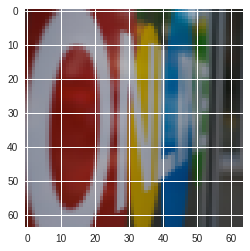

In [6]:
# See what any picture looks like
index = 49
plt.imshow(train_set_x_orig[index])
print ("y = ", train_set_y[:,index], ", it's a '", classes[np.squeeze(train_set_y[:,index])].decode("utf-8"), "' picture.")

In [7]:
# Check each shape, size:
m_train = train_set_y.shape[1]
m_test = test_set_y.shape[1]
num_px = train_set_x_orig.shape[1]

print(str(train_set_x_orig.shape))
print("Number of training examples: m_train:", m_train)
print("Number of testing examples: m_test:", m_test)
print("Height/Width of each image: num_px:", num_px)
print("Each image is of size: (", num_px, ", ", num_px, ", 3)")
print("train_set_x shape: ", train_set_x_orig.shape)
print("train_set_y shape: ", train_set_y.shape)
print("test_set_x shape: ", test_set_x_orig.shape)
print("test_set_y shape: ", test_set_y.shape)

(209, 64, 64, 3)
Number of training examples: m_train: 209
Number of testing examples: m_test: 50
Height/Width of each image: num_px: 64
Each image is of size: ( 64 ,  64 , 3)
train_set_x shape:  (209, 64, 64, 3)
train_set_y shape:  (1, 209)
test_set_x shape:  (50, 64, 64, 3)
test_set_y shape:  (1, 50)


In [8]:
# Reshaping the training images:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

print ("train_set_x_flatten shape: ", train_set_x_flatten.shape)
print ("train_set_y shape: ", train_set_y.shape)
print ("test_set_x_flatten shape: ", test_set_x_flatten.shape)
print ("test_set_y shape: ", test_set_y.shape)
print ("Sanity check after reshaping: ", train_set_x_flatten[0:5,0])

train_set_x_flatten shape:  (12288, 209)
train_set_y shape:  (1, 209)
test_set_x_flatten shape:  (12288, 50)
test_set_y shape:  (1, 50)
Sanity check after reshaping:  [17 31 56 22 33]


In [0]:
# Standardize our images: Divide by 255 (Maximum value of a pixel)
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

In [0]:
# Our Activation function: (Sigmoid)
def sigmoid(z):
  return (1 / (1 + np.exp(-z)))

In [0]:
# We'd need to initialize vectors with zero and return
def init_with_zeros(size):
  weight = np.zeros(shape=(size, 1))
  bias = 0
  
  assert(weight.shape == (size, 1))
  assert(bias == 0 or isinstance(bias, float) or isinstance(bias, int))
  
  return weight, bias

In [0]:
# Calculate cost function and gradient (forward propogation)
def propagate(weight, bias, X, Y):
  m = X.shape[1]
    
  A = sigmoid(np.dot(weight.T, X) + bias)  # compute activation
  cost = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))  # compute cost
  
  dw = (1 / m) * np.dot(X, (A - Y).T)
  db = (1 / m) * np.sum(A - Y)

  assert(dw.shape == weight.shape)
  assert(db.dtype == float)
  cost = np.squeeze(cost)
  assert(cost.shape == ())
  gradients = {"dw": dw, "db": db}

  return gradients, cost

In [0]:
# Optimize, i.e. updating weights and biases using gradient descent, minimizing cost function
def optimize(weight, bias, X, Y, alpha, number_of_iterations, print_cost=False):
  
  costs = []
    
  for i in range(number_of_iterations):

      gradients, cost = propagate(weight, bias, X, Y)
      
      dw = gradients["dw"]
      db = gradients["db"]

      weight = weight - alpha * dw
      bias = bias - alpha * db
      
      if i % 100 == 0:
          costs.append(cost)

      # Print the cost every 100 training examples
      if print_cost and i % 100 == 0:
          print ("Cost after iteration %i: %f" % (i, cost))

  parameters = {"w": weight, "b": bias}

  gradients = {"dw": dw, "db": db}

  return parameters, gradients, costs

In [0]:
# Predict a test image:
def predict(weight, bias, X):
  
  m = X.shape[1]
  Y_prediction = np.zeros((1, m))
  weight = weight.reshape(X.shape[0], 1)

  A = sigmoid(np.dot(weight.T, X) + bias)

  for i in range(A.shape[1]):
      Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0

  assert(Y_prediction.shape == (1, m))

  return Y_prediction

In [0]:
# Our Logistic Regression Model:
def model(X_train, Y_train, X_test, Y_test, alpha=0.5, number_of_iterations=2000, print_cost=False):
  weight, bias = init_with_zeros(X_train.shape[0])

  parameters, gradients, costs = optimize(weight, bias, X_train, Y_train, alpha, number_of_iterations, print_cost)

  weight = parameters["w"]
  bias = parameters["b"]

  Y_prediction_test = predict(weight, bias, X_test)
  Y_prediction_train = predict(weight, bias, X_train)

  print("Train Accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
  print("Test Accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

  d = {"costs": costs,
       "Y_prediction_test": Y_prediction_test, 
       "Y_prediction_train" : Y_prediction_train, 
       "w" : weight, 
       "b" : bias,
       "learning_rate" : alpha,
       "num_iterations": number_of_iterations}

  return d

In [16]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, alpha = 0.005, number_of_iterations = 2000, print_cost = False)

Train Accuracy: 99.04306220095694 %
Test Accuracy: 70.0 %


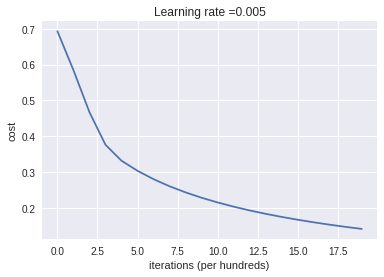

In [17]:
# Let's plot our learning rate vs cost function:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

y = 1.0, your algorithm predicts a "cat" picture.


/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


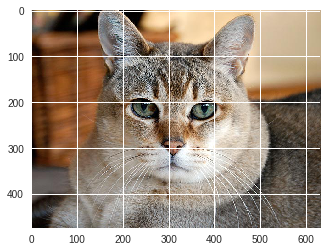

In [32]:
# Test using a real unique image
my_image = "some_cat.jpg" # this is your brand new image you want to test

# We'll need to preprocess the image:
fname = my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(num_px, num_px)).reshape((1, num_px * num_px * 3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", our algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")